In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
 msg = pd.read_csv("data/msg.csv")
# ses_1_42 = pd.read_csv("data/ses_1_42.csv")
ses_full = pd.read_csv("data/ses_full.csv")

In [9]:
'''#subsetting some invalid sessions without msg data
ses_full = ses_full[-ses_full.question_student_count.isnull()]
# lower case text
ses_full['text'] = ses_full.text.str.lower()

#suggested growth mindset phrases
gm_phrase = ['hard work', 'working hard',"you're so close", 'you are so close', 'nice effort', 'good job', \
             "you've got this", "you got this", "keep at it", "keep going", "keep trying", "almost there", "yet"]

#individually inputting phrases
for i, phrase in enumerate(gm_phrase):
    _ls_any = [1 if t.count(phrase)> 0 else 0 for t in msg.text_lower.astype(str)]
    msg['gp_' + str(i)] = _ls_any
    

ses_full = ses_full.merge(pd.DataFrame(msg[(msg.sent_from == 'tutor')].groupby('session_id')[msg.columns[-13:]].sum()).reset_index(), how = 'left', on = 'session_id')


#summing across rows and than a boolean for gp preasent
ses_full['gp_sum'] = ses_full[ses_full.columns[-13:]].sum(axis = 1)
ses_full.loc[ ses_full.gp_sum > 0 , 'gp_bool']  =  1
ses_full.loc[ ses_full.gp_sum == 0 , 'gp_bool']  =  0'''

In [7]:
ses_full[ses_full.session_count >4].groupby('student_id')['gb_bool'].mean().shape#.hist()#gp_bool.hist()

(1484,)

In [16]:
ses_full[ses_full.columns[-16:]].sum().sort_values()

gp_8           6.000000
gp_1          13.000000
gp_10         18.000000
gp_4          27.000000
gp_rate       32.032465
gp_0          53.000000
gp_3          58.000000
gp_6          59.000000
gp_7         292.000000
gp_2         390.000000
gp_9         669.000000
gp_11       2690.000000
gp_12       3066.000000
gp_5        9345.000000
gp_bool     9598.000000
gp_sum     16686.000000
dtype: float64

In [17]:
ses.info()[:40]

gp_bool,0.0,1.0
gp_0,0.0,0.005522
gp_1,0.0,0.001354
gp_2,0.0,0.040633
gp_3,0.0,0.006043
gp_4,0.0,0.002813
gp_5,0.0,0.973640
gp_6,0.0,0.006147
gp_7,0.0,0.030423
gp_8,0.0,0.000625
gp_9,0.0,0.069702


In [20]:
ses_full.groupby('gp_bool')['session_id'].count()

gp_bool
0.0    24120
1.0     9598
Name: session_id, dtype: int64

In [30]:
ses_full[ses_full.gp_sum>=3]['gb_bool'].mean()

0.915053091817614

In [34]:
ses_full['gp_rate'] =  ses_full['gp_sum'] / ses_full['word_count'] 

In [42]:
ses_full.to_csv('data/ses_full.csv')

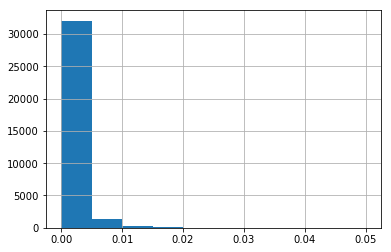

In [36]:
ses_full['gp_rate'].hist()

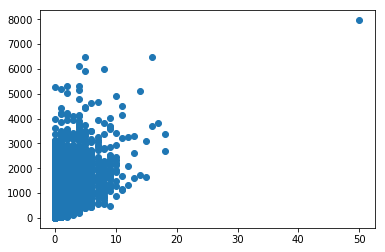

In [41]:
plt.scatter(ses_full['gp_sum'], ses_full['word_count'])

In [1]:
ses_full = pd.read_csv("data/ses_full.csv")

NameError: name 'pd' is not defined

In [77]:
s_meta = pd.read_csv("data/student_user_table.csv")
s_meta = s_meta[['User Id', 'First Name']]
s_meta.columns = ['student_id' , 'first_name']
ses_full = ses_full.merge(s_meta, how = 'left', on = 'student_id')
ses_full_student = ses_full[-pd.isnull(ses_full.first_name)]

ses_full_student['first_name'] = ses_full_student.first_name.str.lower()
names = ses_full_student.first_name.values
text = ses_full_student.text.values
name_count = []
for tup in zip(names, text):
    name_count.append(tup[1].count(tup[0]))

ses_full_student['name_count'] = name_count
ses_full_student['name_rate'] = ses_full_student.name_count / ses_full_student.word_count

min_ses_df = pd.DataFrame(msg.groupby('session_id')['created_at_clean'].min()).reset_index()
max_ses_df = pd.DataFrame(msg.groupby('session_id')['created_at_clean'].max()).reset_index()
df_diff = min_ses_df.merge(max_ses_df, how = 'left', on = 'session_id')
df_diff['ses_time_delta'] = (df_diff['created_at_clean_y'] - df_diff['created_at_clean_x']).astype('timedelta64[m]')
ses_full = ses_full.merge(df_diff, how = 'left', on = "session_id")



In [6]:
min_ses_df = pd.DataFrame(msg.groupby('session_id')['created_at_clean'].min()).reset_index()
max_ses_df = pd.DataFrame(msg.groupby('session_id')['created_at_clean'].max()).reset_index()
msg['created_at_clean']  = pd.to_datetime(msg['created_at_clean'], format='%Y-%m-%d %H:%M:%S').astype('int64')
eighty_ses_df = pd.DataFrame(msg.groupby('session_id')['created_at_clean'].quantile([0.8]).astype('datetime64[ns]')).reset_index()[['session_id','created_at_clean']]
eighty_ses_df.columns = ['session_id', 'eighty_perc_ts']
msg['created_at_clean']  = pd.to_datetime(msg['created_at_clean'], format='%Y-%m-%d %H:%M:%S')


In [35]:
df_diff = min_ses_df.merge(max_ses_df, how = 'left', on = 'session_id')
# df_diff['ses_time_delta'] = (df_diff['created_at_clean_y'] - df_diff['created_at_clean_x']).astype('timedelta64[m]')
# ses_full = ses_full.merge(df_diff, how = 'left', on = "session_id")

In [38]:
msg = msg.merge(eighty_ses_df, how = 'left', on = 'session_id')

In [58]:
ses_full['timestamp_clean']  = pd.to_datetime(ses_full['timestamp_clean'], format='%Y-%m-%d %H:%M:%S')



In [44]:
msg[msg['created_at_clean'] < msg['eighty_perc_ts']][['eighty_perc_ts', 'created_at_clean']]

,eighty_perc_ts,created_at_clean
0,2016-06-08 10:19:58.400,2016-06-08 10:19:30
1,2016-06-08 10:19:58.400,2016-06-08 10:19:50
3,2016-06-08 12:10:33.600,2016-06-08 12:07:59
4,2016-06-08 12:10:33.600,2016-06-08 12:08:09
5,2016-06-08 12:10:33.600,2016-06-08 12:08:15
6,2016-06-08 12:10:33.600,2016-06-08 12:08:31
7,2016-06-08 12:10:33.600,2016-06-08 12:08:37
8,2016-06-08 12:10:33.600,2016-06-08 12:09:27
9,2016-06-08 12:10:33.600,2016-06-08 12:09:36
10,2016-06-08 12:10:33.600,2016-06-08 12:09:55


In [8]:
msg[msg.session_id == 299891]

,Unnamed: 0,Unnamed: 0.1,session_id,created_at,sent_from,sent_to,content_type,text,created_at_clean,text_readable,...,crp_3,crb_0,crb_1,crb_2,crb_3,crb_4,crb_5,crb_6,crb_7,crb_8
2546604,2825188,114,299891,2016-06-08 01:53:18 UTC,student,tutor,image,https://math-crunch.s3.amazonaws.com/problem-i...,2016-06-08 01:53:18,student: https://math-crunch.s3.amazonaws.com/...,...,0,0,0,0,0,0,0,0,0,0
2546605,2825190,116,299891,2016-06-08 01:53:21 UTC,tutor,student,text,"\nHello Sophie, Welcome to Yup!:)",2016-06-08 01:53:21,"tutor: \nHello Sophie, Welcome to Yup!:)",...,0,0,0,0,0,0,0,0,0,0
2546606,2825191,117,299891,2016-06-08 01:53:25 UTC,student,tutor,text,hello,2016-06-08 01:53:25,student: hello,...,0,0,0,0,0,0,0,0,0,0
2546607,2825192,118,299891,2016-06-08 01:53:37 UTC,student,tutor,text,I was confused with how number 2 would be 360,2016-06-08 01:53:37,student: I was confused with how number 2 woul...,...,0,0,0,0,0,0,0,0,0,0
2546608,2825193,119,299891,2016-06-08 01:53:59 UTC,student,tutor,text,I have a math final tomorrow and would really ...,2016-06-08 01:53:59,student: I have a math final tomorrow and woul...,...,0,0,0,0,0,0,0,0,0,0
2546609,2825194,120,299891,2016-06-08 01:54:05 UTC,tutor,student,text,Please give me a minute to review your problem.,2016-06-08 01:54:05,tutor: Please give me a minute to review your ...,...,0,0,0,0,0,0,0,0,0,0
2546622,2825210,137,299891,2016-06-08 01:56:01 UTC,student,tutor,text,ok,2016-06-08 01:56:01,student: ok,...,0,0,0,0,0,0,0,0,0,0
2546630,2825218,145,299891,2016-06-08 01:56:58 UTC,tutor,student,text,"Sorry for the delay, I am working on the proof.",2016-06-08 01:56:58,"tutor: Sorry for the delay, I am working on th...",...,0,0,0,0,0,0,0,0,0,0
2546631,2825219,146,299891,2016-06-08 01:57:17 UTC,student,tutor,text,sure,2016-06-08 01:57:17,student: sure,...,0,0,0,0,0,0,0,0,0,0


In [70]:
ses_full[(ses_full.gb_bool == 1)].groupby('student_complained')['session_id'].count()

student_complained
False    11725
True      5872
Name: session_id, dtype: int64

In [68]:
ses_full[(ses_full.gb_bool == 1)].groupby(['student_complaint_speed'])['session_id'].count()

student_complaint_speed
False    14951
True      2646
Name: session_id, dtype: int64

In [67]:
ses_full[(ses_full.gb_bool == 1)].groupby('student_complaint_subject')['session_id'].count()

student_complaint_subject
False    16010
True      1587
Name: session_id, dtype: int64

In [69]:
ses_full[(ses_full.gb_bool == 1)].groupby('student_complaint_clarity')['session_id'].count()

student_complaint_clarity
False    15550
True      2047
Name: session_id, dtype: int64

In [72]:
ses_full[ses_full.student_complained == True][['student_id', 'session_count']]

,student_id,session_count
2,343165,1
13,382198,1
36,329680,2
45,382430,1
46,144684,17
53,305374,3
54,305374,3
66,146293,2
75,378507,203
88,381341,5


In [77]:
ses_full[ses_full.student_id == 608993]['student_complained']

36681     True
36684     True
36721    False
36722     True
36723     True
36748     True
36749    False
36760    False
36764     True
Name: student_complained, dtype: bool

In [78]:
ses_full['tutor_question_count'] = ses_full['question_count'] - ses_full['question_student_count']


In [80]:
ses_full.groupby(['timestamp_clean', 'student_complained']).count()

,,Unnamed: 0,session_id,tutor_id,student_id,timestamp,feedback_score,wait_time,ended_by_reason,session_category,consolidated_session_category,...,crb_2,crb_3,crb_4,crb_5,crb_6,crb_7,crb_8,crb_sum,first_name,tutor_question_count
timestamp_clean,student_complained,,,,,,,,,,,,,,,,,,,,,
2016-06-08 00:55:15,False,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2016-06-08 01:06:08,False,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2016-06-08 01:52:46,True,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2016-06-08 01:54:33,False,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2016-06-08 01:55:00,False,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2016-06-08 02:09:05,False,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2016-06-08 03:42:28,False,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2016-06-08 04:05:49,False,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
2016-06-08 04:40:11,False,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


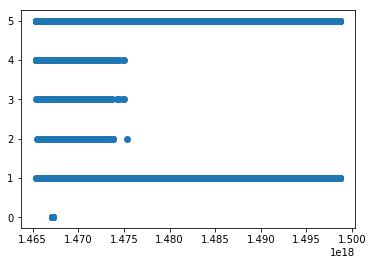

In [60]:
plt.scatter(ses_full['timestamp_clean'].astype('int64'), ses_full['student_rating'])

In [ ]:
# Canned Response feature engineering
cr = pd.read_csv("data/canned_resp.csv")
text_fail_lower = cr.text_fail.str.lower().unique()
text_probe_lower = cr.text_probe.str.lower().unique()[:-1]
text_begin_lower = cr.text_begin.str.lower().unique()[:-1]

for i, phrase in enumerate(text_fail_lower):
    _ls_any = [1 if t.count(phrase)> 0 else 0 for t in msg.text_lower.astype(str)]
    msg['crf_' + str(i)] = _ls_any
ses_full = ses_full.merge(pd.DataFrame(msg[(msg.sent_from == 'tutor')].groupby('session_id')[msg.columns[-len(text_fail_lower):]].sum()).reset_index(), how = 'left', on = 'session_id')   
ses_full['crf_sum'] = ses_full[ses_full.columns[-len(text_fail_lower):]].sum(axis=1)

for i, phrase in enumerate(text_probe_lower):
    _ls_any = [1 if t.count(phrase)> 0 else 0 for t in msg.text_lower.astype(str)]
    msg['crp_' + str(i)] = _ls_any
ses_full = ses_full.merge(pd.DataFrame(msg[(msg.sent_from == 'tutor')].groupby('session_id')[msg.columns[-len(text_probe_lower):]].sum()).reset_index(), how = 'left', on = 'session_id')   
ses_full['crp_sum'] = ses_full[ses_full.columns[-len(text_probe_lower):]].sum(axis=1)

for i, phrase in enumerate(text_begin_lower):
    _ls_any = [1 if t.count(phrase)> 0 else 0 for t in msg.text_lower.astype(str)]
    msg['crb_' + str(i)] = _ls_any
ses_full = ses_full.merge(pd.DataFrame(msg[(msg.sent_from == 'tutor')].groupby('session_id')[msg.columns[-len(text_begin_lower):]].sum()).reset_index(), how = 'left', on = 'session_id')   
ses_full['crb_sum'] = ses_full[ses_full.columns[-len(text_begin_lower):]].sum(axis=1)

In [110]:
ses_full_student.to_csv("data/ses_full_student.csv")

In [111]:
students = pd.read_csv('data/students.csv')

In [11]:
ses_full[ses_full.columns[-35:]].sum().sort_values(ascending = False)

crb_sum    2865.0
crf_sum    2324.0
crb_0      2071.0
crp_sum    1520.0
crp_0      1119.0
crf_3       417.0
crf_0       410.0
crb_1       378.0
crf_5       286.0
crb_3       264.0
crp_2       256.0
crf_1       239.0
crf_6       230.0
crf_4       204.0
crf_13      152.0
crp_1       127.0
crf_2       115.0
crb_2       105.0
crf_11       83.0
crf_9        72.0
crf_15       38.0
crf_16       26.0
crb_4        25.0
crf_7        23.0
crf_17       22.0
crp_3        18.0
crb_6        12.0
crb_8        10.0
crf_14        2.0
crf_12        2.0
crf_8         2.0
crf_10        1.0
crb_5         0.0
crb_7         0.0
dtype: float64

In [12]:
ses_full.columns[-60:]

Index([u'who_any', u'emoji_bool', u'question_student_count', u'high_level',
       u'low_level', u'high_level_ratio', u'ses_num_order', u'gp_0', u'gp_1',
       u'gp_2', u'gp_3', u'gp_4', u'gp_5', u'gp_6', u'gp_7', u'gp_8', u'gp_9',
       u'gp_10', u'gp_11', u'gp_12', u'gp_sum', u'gp_bool',
       u'created_at_clean_x', u'created_at_clean_y', u'ses_time_delta',
       u'crf_0', u'crf_1', u'crf_2', u'crf_3', u'crf_4', u'crf_5', u'crf_6',
       u'crf_7', u'crf_8', u'crf_9', u'crf_10', u'crf_11', u'crf_12',
       u'crf_13', u'crf_14', u'crf_15', u'crf_16', u'crf_17', u'crf_sum',
       u'crp_0', u'crp_1', u'crp_2', u'crp_3', u'crp_sum', u'crb_0', u'crb_1',
       u'crb_2', u'crb_3', u'crb_4', u'crb_5', u'crb_6', u'crb_7', u'crb_8',
       u'crb_sum', u'first_name'],
      dtype='object')

In [18]:
ses_full.groupby('gb_bool')['student_rating'].mean()

gb_bool
0.0    3.515311
1.0    4.737641
Name: student_rating, dtype: float64

In [10]:
ses_1_42[-ses_1_42.session_id.isin(ses_full.session_id)]

,Unnamed: 0,session_id,tutor_id,student_id,timestamp,feedback_score,wait_time,ended_by_reason,session_category,consolidated_session_category,...,what_any,when_any,where_any,why_any,who_any,emoji_bool,question_student_count,high_level,low_level,high_level_ratio
534,534,300586,281457.0,383754,2016-06-16 02:40:51 UTC,NaN,1008.461362,student:app_crashed,false,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,877,301071,NaN,384337,2016-06-20 18:52:17 UTC,NaN,176.755778,student:cancel_button,unclaimed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,879,301073,NaN,383922,2016-06-20 18:59:40 UTC,NaN,53.532128,student:cancel_button,unclaimed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,881,301075,NaN,384336,2016-06-20 19:00:00 UTC,NaN,159.088449,student:cancel_button,unclaimed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,882,301076,NaN,383922,2016-06-20 19:01:07 UTC,NaN,164.095169,student:cancel_button,unclaimed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,883,301077,NaN,383922,2016-06-20 19:04:54 UTC,NaN,42.679763,student:cancel_button,unclaimed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,885,301080,NaN,384339,2016-06-20 19:25:15 UTC,NaN,116.274079,student:cancel_button,unclaimed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,887,301082,NaN,384340,2016-06-20 19:33:47 UTC,NaN,43.010827,student:cancel_button,unclaimed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
918,918,301116,NaN,368517,2016-06-21 00:20:18 UTC,NaN,5.553905,student:cancel_button,unclaimed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,925,301124,NaN,384396,2016-06-21 00:47:27 UTC,NaN,8.780266,student:cancel_button,unclaimed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
len(text_fail_lower)

18

In [54]:
ses_full['crb_sum'].sum()

2865.0

In [55]:
ses_full['crp_sum'].sum()

1520.0

In [56]:
ses_full['crf_sum'].sum()

2324.0